In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
#    import Python SQL toolkit, Object Relational Mapper and Flask
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

from flask import Flask, jsonify


In [4]:
#   create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
#   reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
#   view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
#   save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
#   create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis
   
   
*INSTRUCTIONS*

Design a query to retrieve the last 12 months of precipitation data and plot the results.

Starting from the most recent data point in the database. 

Calculate the date one year from the last date in data set.

Perform a query to retrieve the data and precipitation scores

Save the query results as a Pandas DataFrame and set the index to the date column

Sort the dataframe by date

Use Pandas Plotting with Matplotlib to plot the data


In [9]:
#   get the table names for inspection
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
#   get the 'measurement' column names for inspection
columns = inspector.get_columns('measurement')
for column in columns:
    primarykeystr = ""
    if column['primary_key'] == 1:
        primarykeystr = "Primary Key"
    print(column["name"],column["type"],primarykeystr)


id INTEGER Primary Key
station TEXT 
date TEXT 
prcp FLOAT 
tobs FLOAT 


In [11]:
#   get the 'station' column names for inspection
columns = inspector.get_columns('station')
for column in columns:
    primarykeystr = ""
    if column['primary_key'] == 1:
        primarykeystr = "Primary Key"
    print(column["name"], column["type"], primarykeystr)


id INTEGER Primary Key
station TEXT 
name TEXT 
latitude FLOAT 
longitude FLOAT 
elevation FLOAT 


In [12]:
#   find the most recent date in the data set.
rec_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
rec_date

In [13]:
#    convert the most recent date from text to datetime type
most_rec_date = dt.datetime.strptime(rec_date.date, '%Y-%m-%d')
most_rec_date


datetime.datetime(2017, 8, 23, 0, 0)

In [14]:
#   calculate the date 1 year prior to the last date
yr_date = most_rec_date - dt.timedelta(days=365)
yr_date


datetime.datetime(2016, 8, 23, 0, 0)

In [15]:
#   run query to retrieve the date and precipitation measurements for the last 12 months
#   use average in case of multiple observations for a given day
qry = [func.avg(Measurement.prcp), Measurement.date]
precip_avg = session.query(*qry).\
    filter(Measurement.date >= yr_date).\
    group_by(Measurement.date).all()
precip_avg
#   manually checked that the dates range from '2016-08-03' to '2017-0803'


[(1.5549999999999997, '2016-08-24'),
 (0.07714285714285715, '2016-08-25'),
 (0.016666666666666666, '2016-08-26'),
 (0.06399999999999999, '2016-08-27'),
 (0.5166666666666666, '2016-08-28'),
 (0.24333333333333332, '2016-08-29'),
 (0.011666666666666667, '2016-08-30'),
 (0.6359999999999999, '2016-08-31'),
 (0.006, '2016-09-01'),
 (0.05, '2016-09-02'),
 (0.254, '2016-09-03'),
 (0.276, '2016-09-04'),
 (0.08499999999999999, '2016-09-05'),
 (0.246, '2016-09-06'),
 (0.3333333333333333, '2016-09-07'),
 (0.07666666666666667, '2016-09-08'),
 (0.17833333333333332, '2016-09-09'),
 (0.27999999999999997, '2016-09-10'),
 (0.25, '2016-09-11'),
 (0.308, '2016-09-12'),
 (0.45166666666666666, '2016-09-13'),
 (2.3800000000000003, '2016-09-14'),
 (0.8266666666666667, '2016-09-15'),
 (0.11714285714285715, '2016-09-16'),
 (0.13599999999999998, '2016-09-17'),
 (0.10600000000000001, '2016-09-18'),
 (0.064, '2016-09-19'),
 (0.14714285714285716, '2016-09-20'),
 (0.19499999999999998, '2016-09-21'),
 (0.205714285714

In [16]:
#   save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_avg, columns =['Avg Precipitation', 'Date']).set_index("Date")
precip_df.head()


,Avg Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


In [17]:
#   instruction - sort the dataframe by date
#   NOTE - dataframe is already in date sequence from sort to find most recent date 

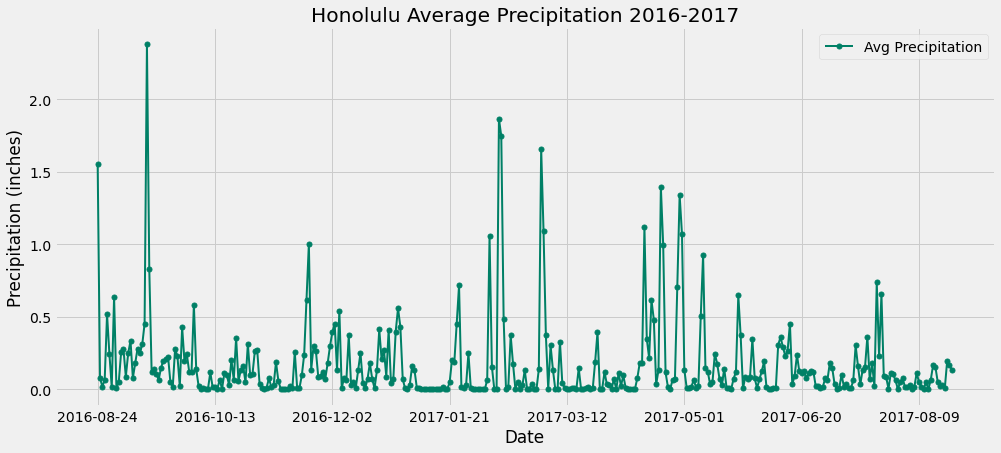

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = precip_df.plot(lw=2, figsize=(15, 6.5), colormap='summer', marker='.', markersize=10, title='Honolulu Average Precipitation 2016-2017')
precip_plot.set_xlabel("Date")
precip_plot.set_ylabel("Precipitation (inches)")
plt.savefig("Images/precipitation.png")



In [19]:
#   use Pandas "describe" to get the summary statistics for the precipitation data
precip_df.describe()


,Avg Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [20]:
#   design a query to calculate the total number stations in the dataset
stat_count = session.query(Station.station).count()
stat_count


9

In [21]:
#   design a query to find the most active stations (i.e. what stations have the most rows?)
#   list the stations and observation counts in decending order
session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
#   capture 'USC00519281' which has the highest number of observations at 2772
max_stat_obs = session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).first()
max_stat = max_stat_obs[0]
max_stat


'USC00519281'

In [23]:
#   using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#   get the observations for 'USC00519281'
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == max_stat).all()


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [24]:
#   get the last 12 months of observations for this station
max_stat12 = session.query(Measurement.tobs).filter(Measurement.station == max_stat).\
    filter(Measurement.date >= yr_date).all()
max_stat12


[(77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (74.0,),


In [25]:
#    create the dataframe
plot_df = pd.DataFrame(max_stat12, columns=["tobs"])
plot_df.head()


,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


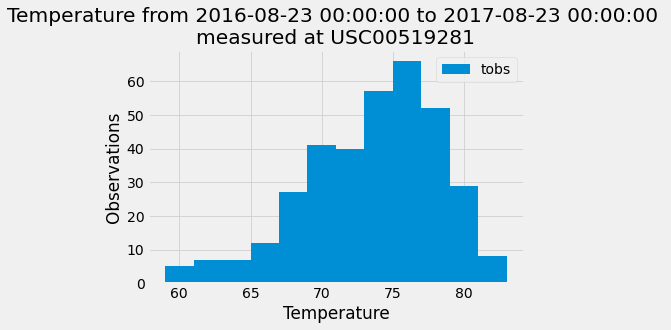

In [26]:
#   plot the histogram
plt.hist(plot_df, bins=12,rwidth=1.0,label='tobs')
plt.grid(axis='both', alpha=0.75)
plt.xlabel('Temperature')
plt.ylabel('Observations')
plt.title(f"Temperature from {yr_date} to {most_rec_date} \nmeasured at {max_stat}")
plt.legend()
plt.savefig("Images/station_histogram.png")


# Close session

In [27]:
#   Close Session
session.close()